참고 

* https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/keras/classification.ipynb

* https://archive.is/fY0FO

In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


* 이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이입니다. 레이블(label)은 0에서 9까지의 정수 배열입니다. 이 값은 이미지에 있는 옷의 클래스(class)를 나타냅니다:


* 레이블 클래스 
        
        0 T-shirt / top
        1 Trouser
        2 Pullover
        3 Dress
        4 Coat
        5 Sandal
        6 Shirt
        7 Sneaker
        8 Bag
        9 Ankle boot

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

### 데이터 탐색

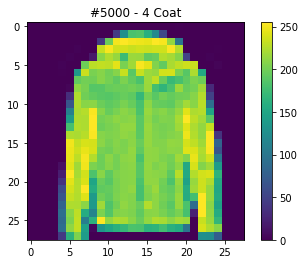

In [5]:
plt.figure()
idx_to_draw = 5000 # 바꾸어보세요
plt.imshow(train_images[idx_to_draw])

lbl = train_labels[idx_to_draw]

plt.title('#{} - {} {}'.format(idx_to_draw, lbl, class_names[lbl]))
plt.colorbar()
plt.grid(False)
plt.show()

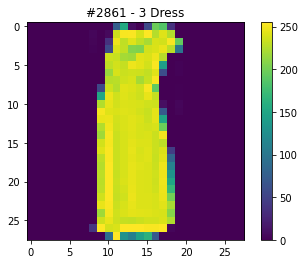

In [6]:
plt.figure()
idx_to_draw = 2861 # 바꾸어보세요
plt.imshow(train_images[idx_to_draw])

lbl = train_labels[idx_to_draw]

plt.title('#{} - {} {}'.format(idx_to_draw, lbl, class_names[lbl]))
plt.colorbar()
plt.grid(False)
plt.show()

### Data 전처리 

신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하겠습니다. 이렇게 하려면 255로 나누어야 합니다. 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요합니다:

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

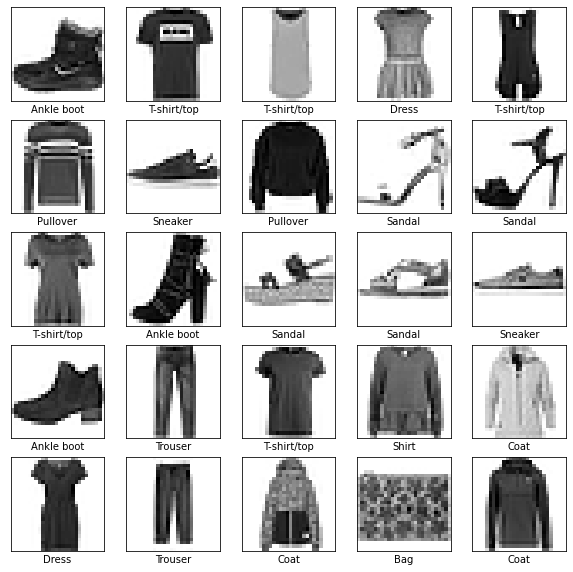

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### TODO : 학습 코드를 위의 참조 url을 이용하여 완성해보세요 

### 모델 구성 & compile

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),  # 첫 번째 Dense 층은 128개의 노드(또는 뉴런)
    keras.layers.Dense(10, activation='softmax') # 두 번째 (마지막) 층은 10개의 노드의 소프트맥스(softmax) 층
])                                               # 10개의 확률을 반환하고 반환된 값의 전체 합은 1

In [10]:
model.compile(optimizer='adam',    # 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # 훈련 단계와 테스트 단계를 모니터링하기 위해 사용

### 모델 훈련 

In [11]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 406us/step - loss: 0.4947 - accuracy: 0.8271
Epoch 2/5
1875/1875 [==============================] - 1s 410us/step - loss: 0.3739 - accuracy: 0.8656
Epoch 3/5
1875/1875 [==============================] - 1s 411us/step - loss: 0.3364 - accuracy: 0.8784
Epoch 4/5
1875/1875 [==============================] - 1s 410us/step - loss: 0.3126 - accuracy: 0.8847
Epoch 5/5
1875/1875 [==============================] - 1s 431us/step - loss: 0.2953 - accuracy: 0.8913


### 정확도 평가 

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3506 - accuracy: 0.8669

테스트 정확도: 0.8669000267982483


### 예측하기 

In [14]:
predictions = model.predict(test_images)

In [15]:
predictions[0]

array([6.0855024e-07, 5.4055498e-08, 8.7704088e-08, 2.8064531e-09,
       3.6553411e-07, 1.5070996e-02, 8.3254980e-07, 9.2738476e-03,
       5.4329257e-06, 9.7564781e-01], dtype=float32)

이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냅니다.

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

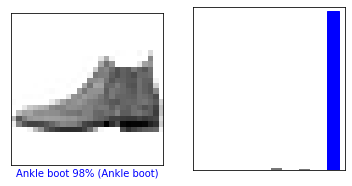

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

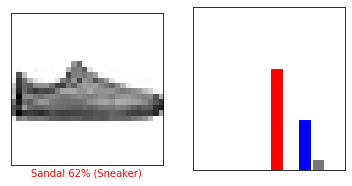

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색입니다. 숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점)입니다. 신뢰도 점수가 높을 때도 잘못 예측할 수 있습니다.

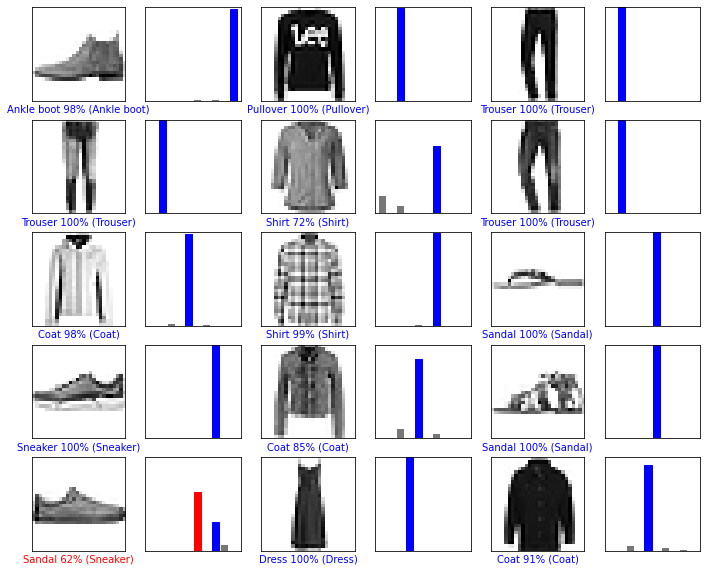

In [25]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [26]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


tf.keras 모델은 **한 번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는데 최적화**되어 있습니다. 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 합니다:

In [27]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = model.predict(img)

print(predictions_single)

[[6.0854848e-07 5.4055391e-08 8.7703754e-08 2.8064531e-09 3.6553374e-07
  1.5070960e-02 8.3254741e-07 9.2738336e-03 5.4329207e-06 9.7564781e-01]]


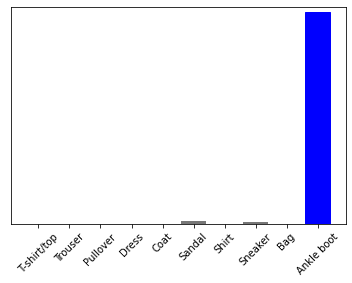

In [29]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [30]:
np.argmax(predictions_single[0])

9

In [31]:
test_labels[0]

9